# IMPORTING Needed Packages :

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score,f1_score
!pip install xgboost
import xgboost as xgb


# EXTRACTING DATA IN CSV FORMAT :

In [2]:
df=pd.read_csv("D:\\Data Science\\files for pratice\\Insurance Prediction.csv")

# DATA CLEANSING & FILLING :

In [3]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [4]:
df.shape

(45211, 11)

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


# OUTLAYERS :

In [7]:
q1=df['age'].quantile(0.25)
q2=df['age'].quantile(0.5)
q3=df['age'].quantile(0.75)
IQR = q3-q1
ul=q3+1.5*IQR
ll=q1-1.5*IQR
IQR,ul,ll

(15.0, 70.5, 10.5)

In [8]:
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [9]:
df['age']=df['age'].clip(ll,ul)

In [10]:
q1=df['dur'].quantile(0.25)
q2=df['dur'].quantile(0.5)
q3=df['dur'].quantile(0.75)
IQR = q3-q1
ul=q3+1.5*IQR
ll=q1-1.5*IQR
IQR,ul,ll

(216.0, 643.0, -221.0)

In [11]:
df['dur'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

In [12]:
df[['y','dur']].corr()

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_18132\111033233.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[['y','dur']].corr()


,dur
dur,1.0


In [13]:
ins_order = df.groupby('y')['dur'].mean().reset_index().sort_values('dur')['y']

C:\Users\Windows 11\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'probability')

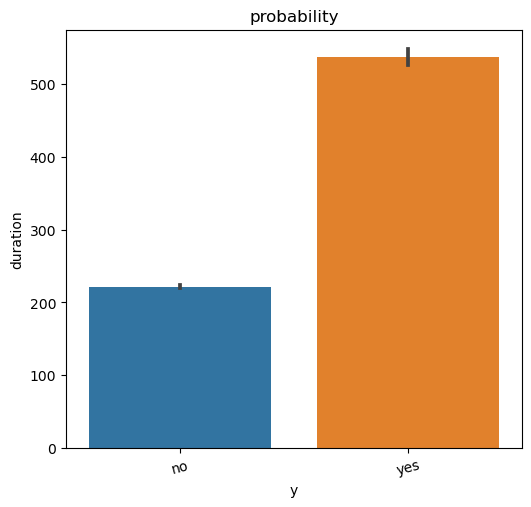

In [14]:
plt.figure(figsize=(20,25))

plt.subplot(431)
sns.barplot(df['y'],df['dur'],order=ins_order)
plt.xticks(rotation=15)
plt.xlabel('y')
plt.ylabel('duration')
plt.title('probability')

In [15]:
q1=df['num_calls'].quantile(0.25)
q2=df['num_calls'].quantile(0.5)
q3=df['num_calls'].quantile(0.75)
IQR = q3-q1
ul=q3+1.5*IQR
ll=q1-1.5*IQR
IQR,ul,ll

(2.0, 6.0, -2.0)

In [16]:
df['num_calls'].describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_calls, dtype: float64

In [17]:
df[['num_calls','y']].corr()

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_18132\3339063294.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[['num_calls','y']].corr()


,num_calls
num_calls,1.0


In [18]:
inscall_order = df.groupby('y')['num_calls'].mean().reset_index().sort_values('num_calls')['y']

C:\Users\Windows 11\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'probability')

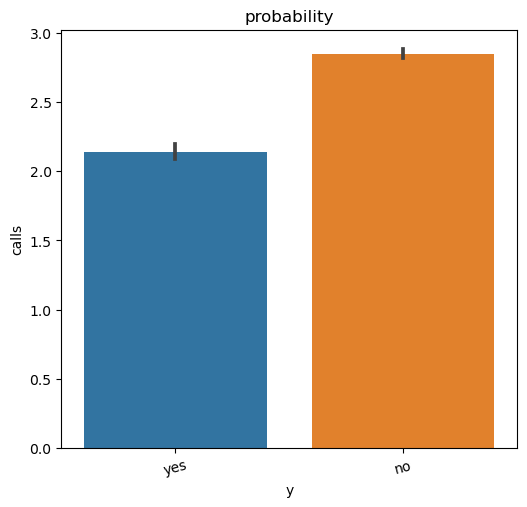

In [19]:
plt.figure(figsize=(20,25))

plt.subplot(431)
sns.barplot(df['y'],df['num_calls'],order=inscall_order)
plt.xticks(rotation=15)
plt.xlabel('y')
plt.ylabel('calls')
plt.title('probability')

# DUPLICATES :

In [20]:
df=df.drop_duplicates()

In [21]:
df.shape

(45205, 11)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45205 non-null  float64
 1   job             45205 non-null  object 
 2   marital         45205 non-null  object 
 3   education_qual  45205 non-null  object 
 4   call_type       45205 non-null  object 
 5   day             45205 non-null  int64  
 6   mon             45205 non-null  object 
 7   dur             45205 non-null  int64  
 8   num_calls       45205 non-null  int64  
 9   prev_outcome    45205 non-null  object 
 10  y               45205 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 4.1+ MB


In [23]:
df['age']=df['age'].astype(int)

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_18132\1889264292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age']=df['age'].astype(int)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45205 non-null  int32 
 1   job             45205 non-null  object
 2   marital         45205 non-null  object
 3   education_qual  45205 non-null  object
 4   call_type       45205 non-null  object
 5   day             45205 non-null  int64 
 6   mon             45205 non-null  object
 7   dur             45205 non-null  int64 
 8   num_calls       45205 non-null  int64 
 9   prev_outcome    45205 non-null  object
 10  y               45205 non-null  object
dtypes: int32(1), int64(3), object(7)
memory usage: 4.0+ MB


In [25]:
object_columns=[i for i in df.columns if df[i].dtype == 'object']

In [26]:
for i in object_columns:
    print(f'"{i}" is divided into"{len(df[i].value_counts())}"')

"job" is divided into"12"
"marital" is divided into"3"
"education_qual" is divided into"4"
"call_type" is divided into"3"
"mon" is divided into"12"
"prev_outcome" is divided into"4"
"y" is divided into"2"


In [27]:
df['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [28]:
df['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [29]:
df['marital'].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [30]:
df['call_type'].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [31]:
df['mon'].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [32]:
df['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [33]:
df['y'].value_counts()

no     39916
yes     5289
Name: y, dtype: int64

# EDA(Exploratory Data Analysis) -
## VISUALIZATION :

C:\Users\Windows 11\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Windows 11\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Windows 11\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Windows

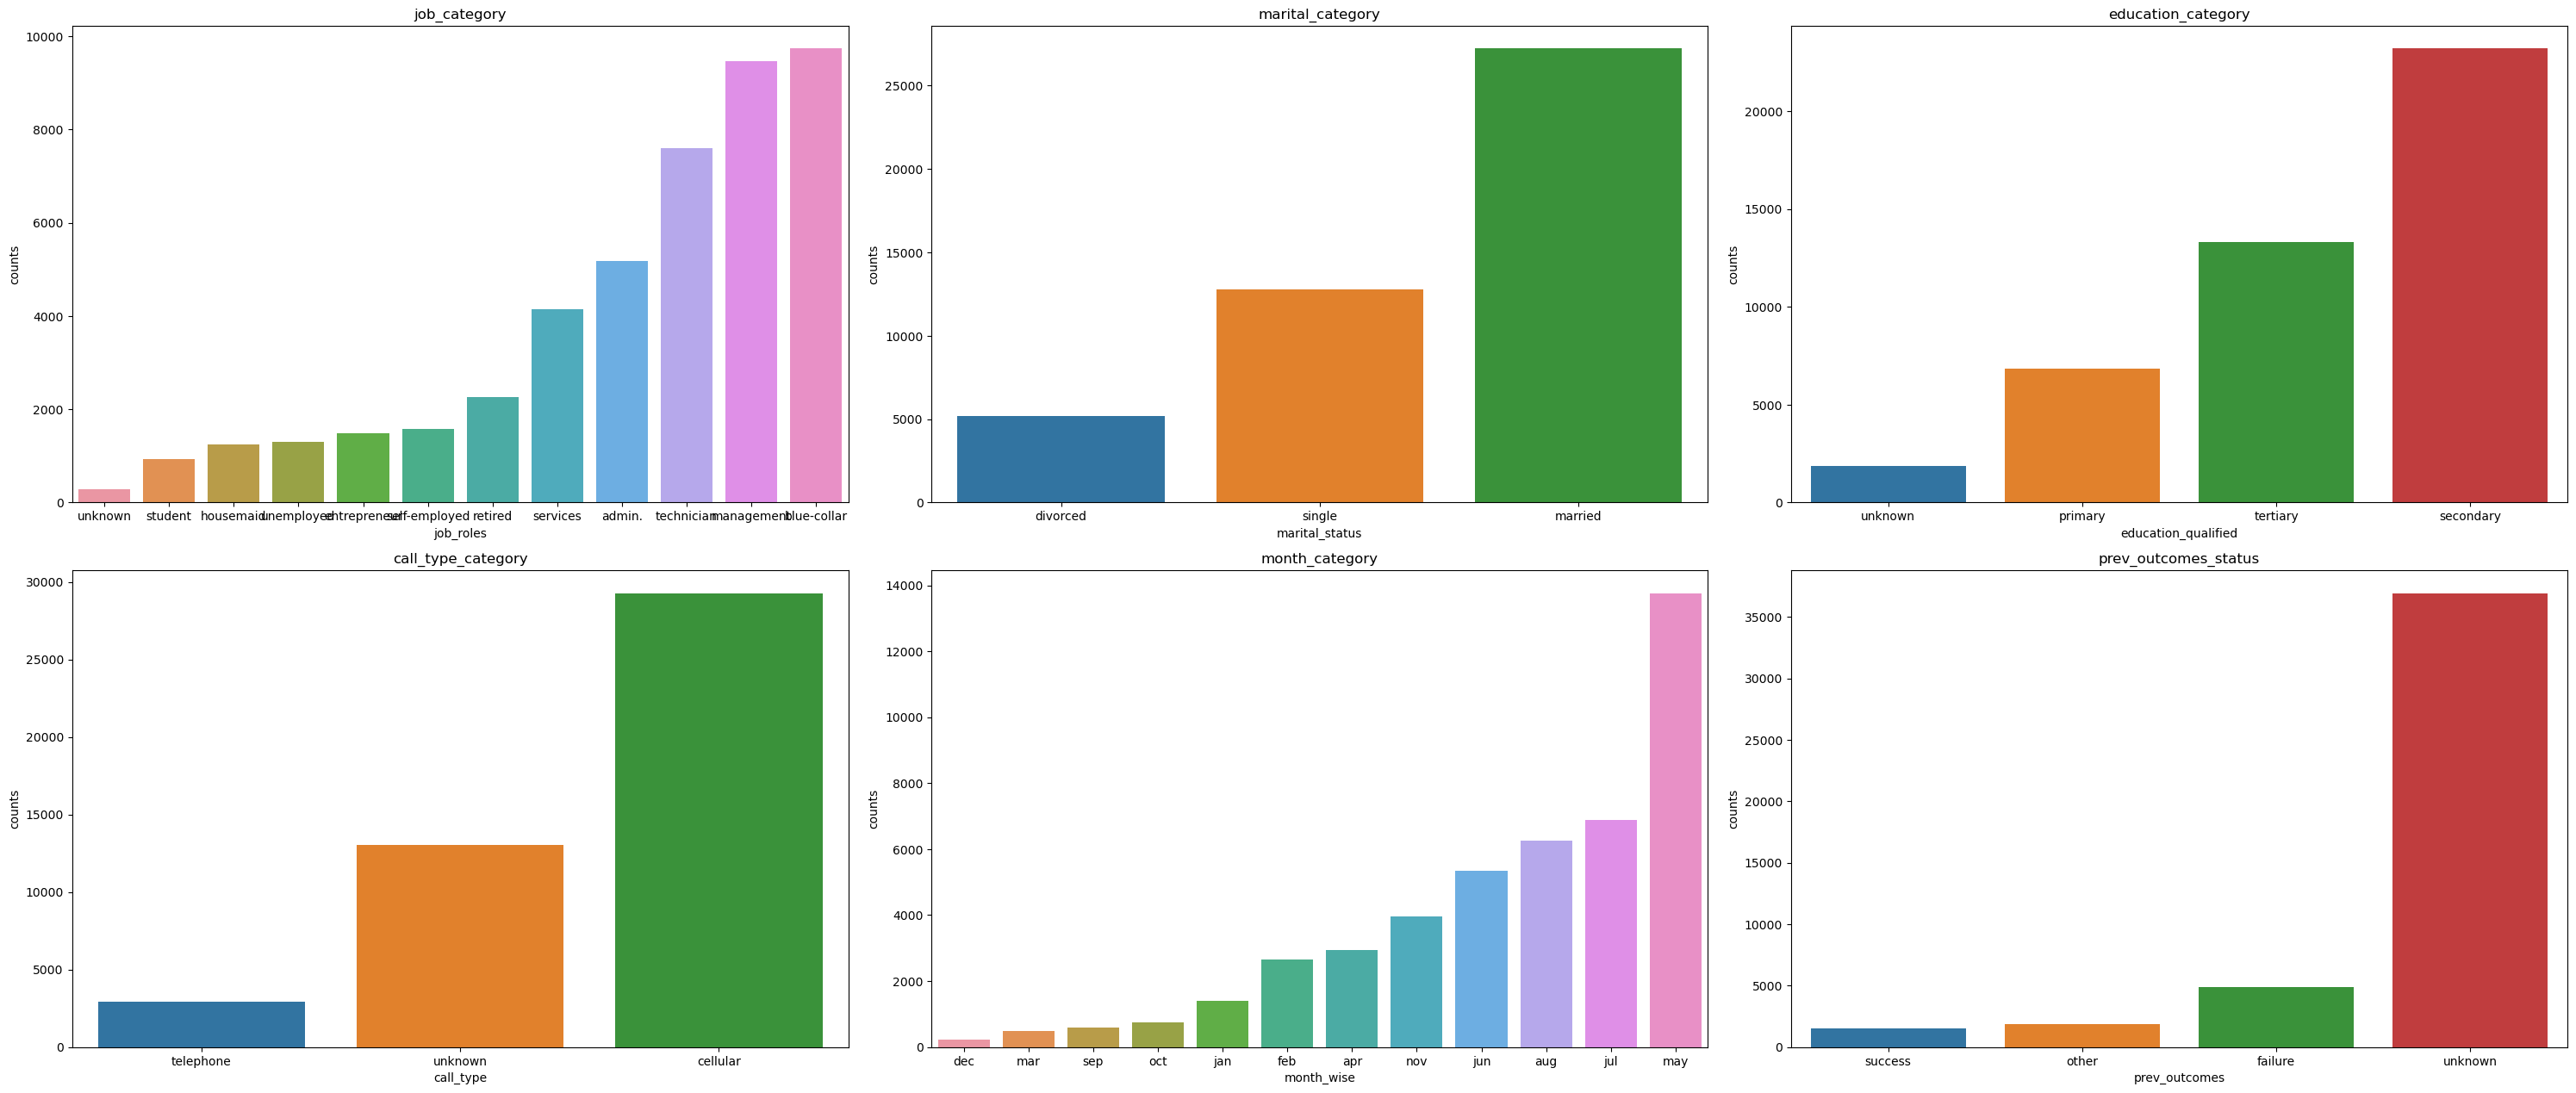

In [34]:
plt.figure(figsize=(30,25))
plt.subplot(431)
sns.countplot(df['job'],order=df['job'].value_counts().index[::-1])
plt.xlabel('job_roles')
plt.ylabel('counts')
plt.title('job_category')

plt.subplot(432)
sns.countplot(df['marital'],order=df['marital'].value_counts().index[::-1])
plt.xlabel('marital_status')
plt.ylabel('counts')
plt.title('marital_category')


plt.subplot(433)
sns.countplot(df['education_qual'],order=df['education_qual'].value_counts().index[::-1])
plt.xlabel('education_qualified')
plt.ylabel('counts')
plt.title('education_category')


plt.subplot(434)
sns.countplot(df['call_type'],order=df['call_type'].value_counts().index[::-1])
plt.xlabel('call_type')
plt.ylabel('counts')
plt.title('call_type_category')



plt.subplot(435)
sns.countplot(df['mon'],order=df['mon'].value_counts().index[::-1])
plt.xlabel('month_wise')
plt.ylabel('counts')
plt.title('month_category')



plt.subplot(436)
sns.countplot(df['prev_outcome'],order=df['prev_outcome'].value_counts().index[::-1])
plt.xlabel('prev_outcomes')
plt.ylabel('counts')
plt.title('prev_outcomes_status')

plt.tight_layout()

In [35]:
crosstb=pd.crosstab(df['job'],df['y'])
crosstb1=pd.crosstab(df['marital'],df['y'])
crosstb2=pd.crosstab(df['education_qual'],df['y'])
crosstb3=pd.crosstab(df['call_type'],df['y'])
crosstb4=pd.crosstab(df['mon'],df['y'])
crosstb5=pd.crosstab(df['prev_outcome'],df['y'])

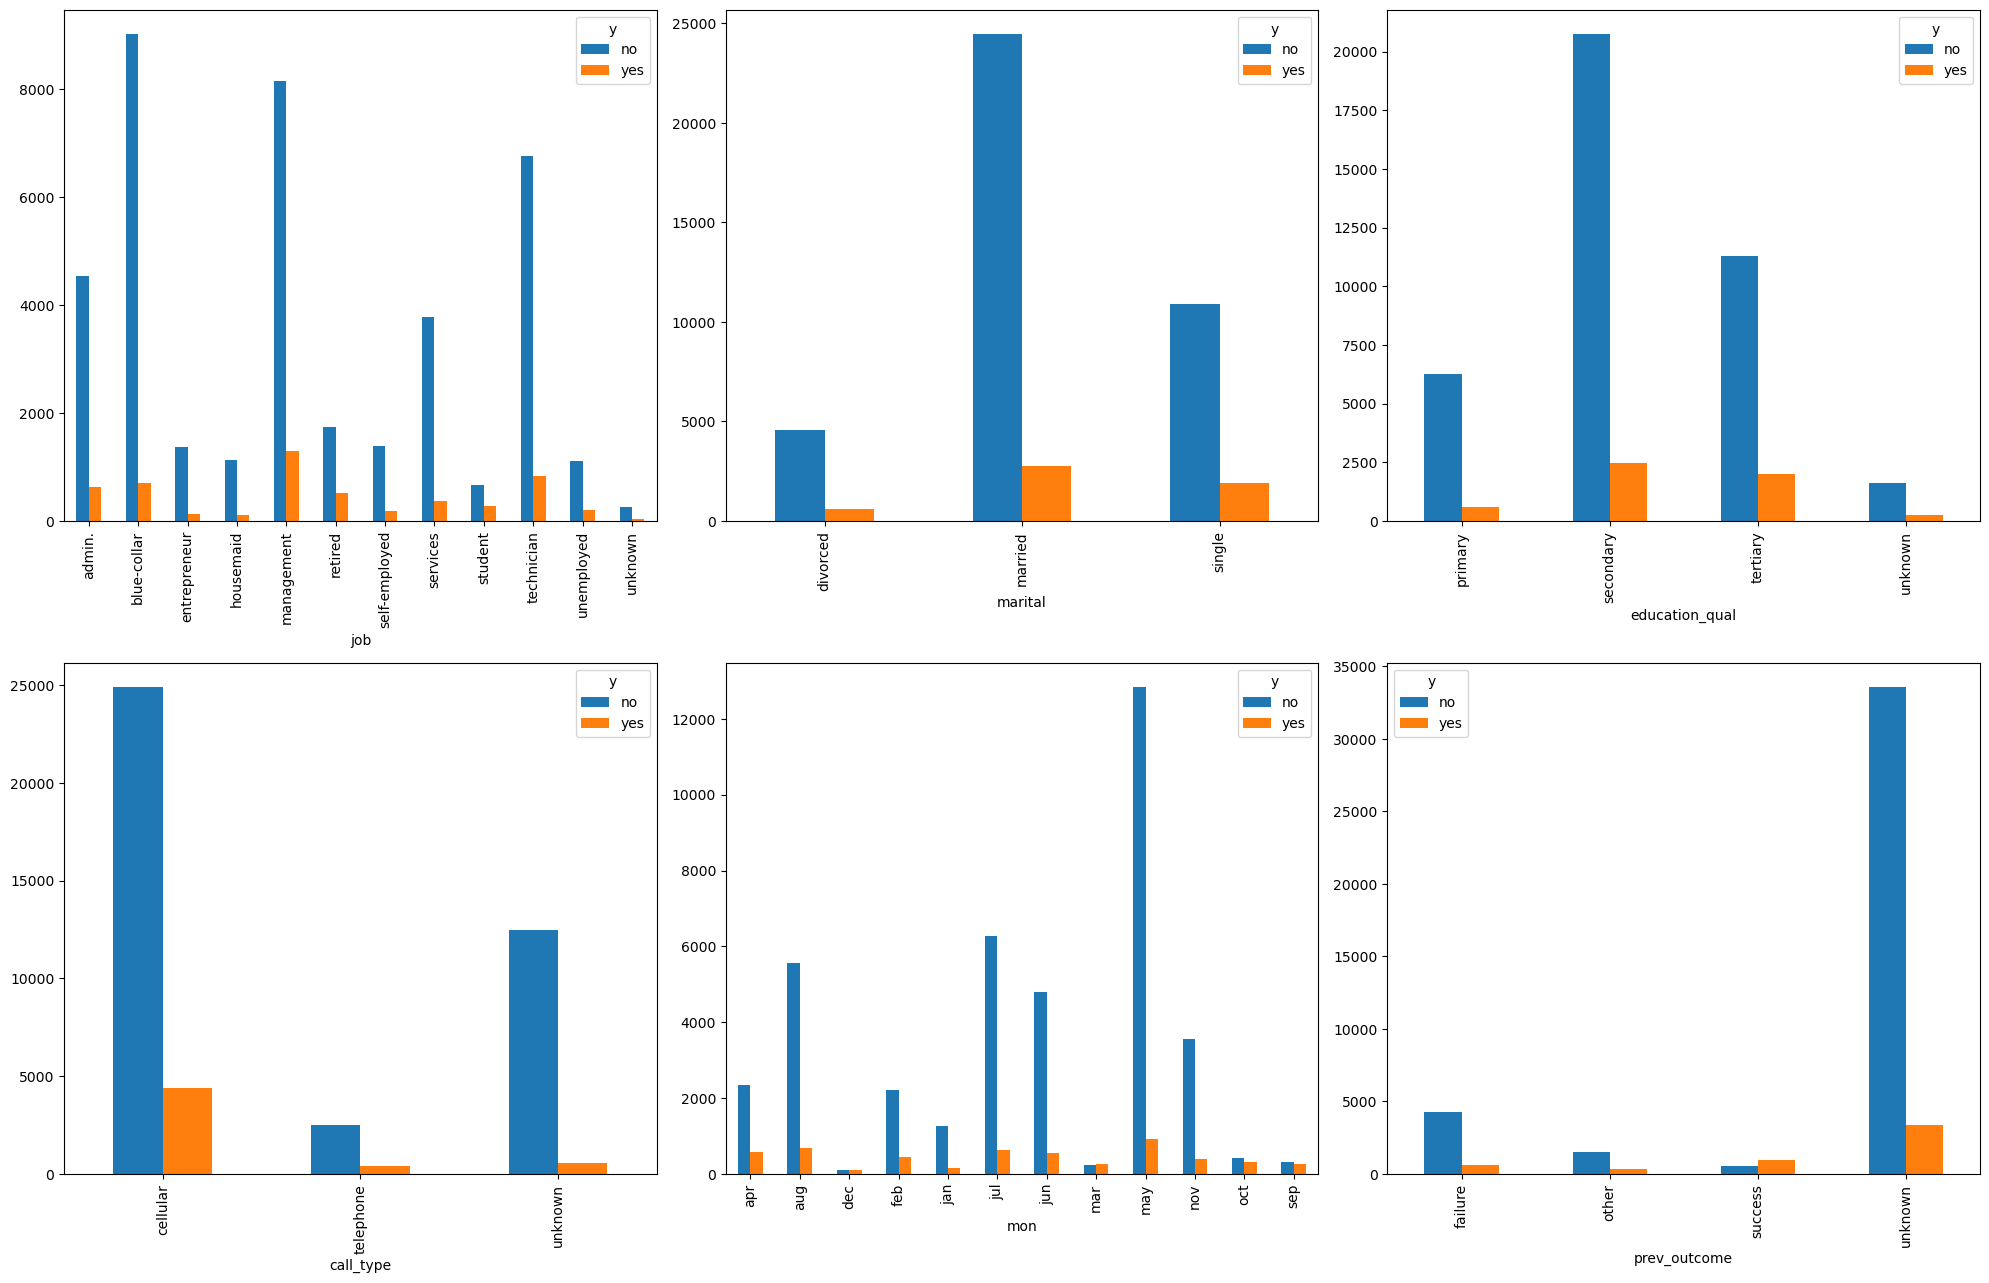

In [36]:
plt.figure(figsize=(20,25))

ax=plt.subplot(431)
barplot=crosstb.plot(kind='bar',ax=ax)

ax=plt.subplot(432)
barplot1=crosstb1.plot(kind='bar',ax=ax)

ax=plt.subplot(433)
barplot2=crosstb2.plot(kind='bar',ax=ax)

ax=plt.subplot(434)
barplot3=crosstb3.plot(kind='bar',ax=ax)

ax=plt.subplot(435)
barplot4=crosstb4.plot(kind='bar',ax=ax)

ax=plt.subplot(436)
barplot5=crosstb5.plot(kind='bar',ax=ax)



plt.tight_layout()

C:\Users\Windows 11\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Windows 11\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Windows 11\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

Text(0.5, 1.0, 'prev_outcomes_status')

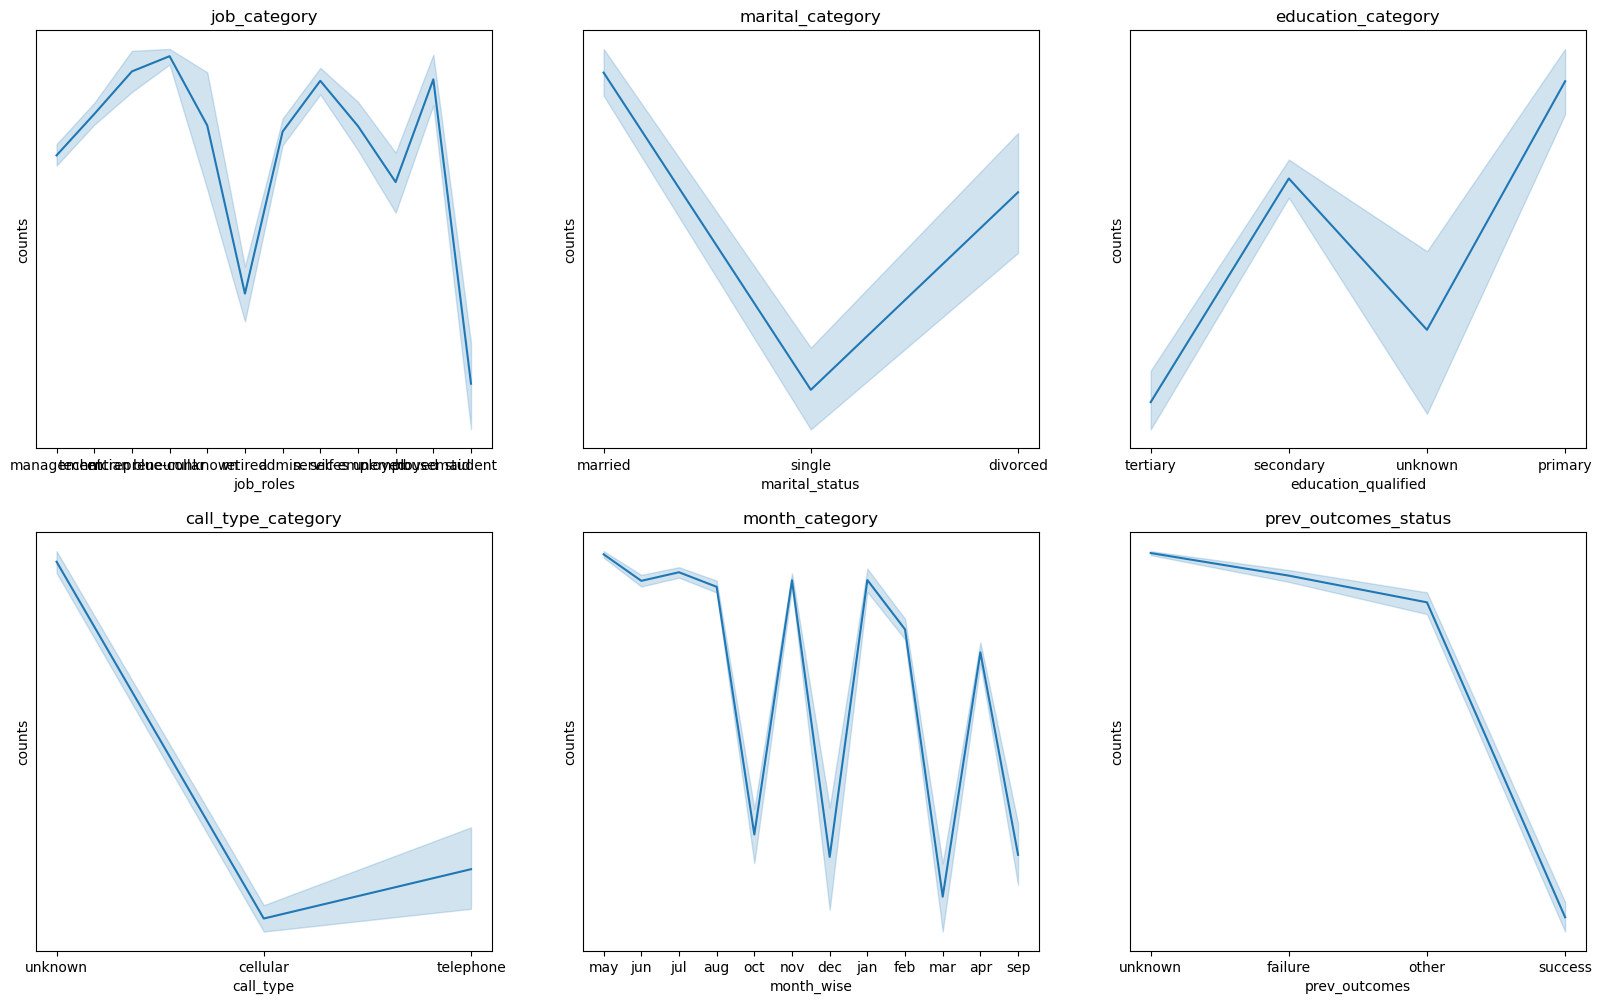

In [37]:
plt.figure(figsize=(20,25))
plt.subplot(431)
sns.lineplot(df['job'],df['y'])
plt.xlabel('job_roles')
plt.ylabel('counts')
plt.title('job_category')

plt.subplot(432)
sns.lineplot(df['marital'],df['y'])
plt.xlabel('marital_status')
plt.ylabel('counts')
plt.title('marital_category')


plt.subplot(433)
sns.lineplot(df['education_qual'],df['y'])
plt.xlabel('education_qualified')
plt.ylabel('counts')
plt.title('education_category')


plt.subplot(434)
sns.lineplot(df['call_type'],df['y'])
plt.xlabel('call_type')
plt.ylabel('counts')
plt.title('call_type_category')



plt.subplot(435)
sns.lineplot(df['mon'],df['y'])
plt.xlabel('month_wise')
plt.ylabel('counts')
plt.title('month_category')



plt.subplot(436)
sns.lineplot(df['prev_outcome'],df['y'])
plt.xlabel('prev_outcomes')
plt.ylabel('counts')
plt.title('prev_outcomes_status')



# PREPROCESSING -
## ENCODING :

In [38]:
df['job']=df['job'].map({'unknown':0,'student':1,'housemaid':2,'unemployed':3,'entrepreneur':4,'self-employed':5,'retired':6,'services':7,'admin.':8,'technician':9,'management':10,'blue-collar':11})

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_18132\1346152064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job']=df['job'].map({'unknown':0,'student':1,'housemaid':2,'unemployed':3,'entrepreneur':4,'self-employed':5,'retired':6,'services':7,'admin.':8,'technician':9,'management':10,'blue-collar':11})


In [39]:
df['education_qual']=df['education_qual'].map({'unknown':0,'primary':1,'tertiary':2,'secondary':3})

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_18132\3167383202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education_qual']=df['education_qual'].map({'unknown':0,'primary':1,'tertiary':2,'secondary':3})


In [40]:
df['call_type']=df['call_type'].map({'telephone':0,'unknown':1,'cellular':2})

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_18132\213183592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call_type']=df['call_type'].map({'telephone':0,'unknown':1,'cellular':2})


In [41]:
df['mon']=df['mon'].map({'dec':11,'mar':2,'sep':8,'oct':9,'jan':0,'feb':1,'apr':3,'nov':10,'jun':5,'aug':7,'jul':6,'may':4})

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_18132\3979305006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mon']=df['mon'].map({'dec':11,'mar':2,'sep':8,'oct':9,'jan':0,'feb':1,'apr':3,'nov':10,'jun':5,'aug':7,'jul':6,'may':4})


In [42]:
df['prev_outcome']=df['prev_outcome'].map({'success':0,'other':1,'failure':2,'unknown':3})

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_18132\1062918265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prev_outcome']=df['prev_outcome'].map({'success':0,'other':1,'failure':2,'unknown':3})


In [43]:
df['marital']=df['marital'].map({'divorced':0,'single':1,'married':2})

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_18132\3064492795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital']=df['marital'].map({'divorced':0,'single':1,'married':2})


In [44]:
df['y']=df['y'].map({'no':0,'yes':1})

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_18132\3018908022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y']=df['y'].map({'no':0,'yes':1})


In [45]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,10,2,2,1,5,4,261,1,3,0
1,44,9,1,3,1,5,4,151,1,3,0
2,33,4,2,3,1,5,4,76,1,3,0
3,47,11,2,0,1,5,4,92,1,3,0
4,33,0,1,0,1,5,4,198,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,2,2,2,17,10,977,3,3,1
45207,70,6,0,1,2,17,10,456,2,3,1
45208,70,6,2,3,2,17,10,1127,5,0,1
45209,57,11,2,3,0,17,10,508,4,3,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             45205 non-null  int32
 1   job             45205 non-null  int64
 2   marital         45205 non-null  int64
 3   education_qual  45205 non-null  int64
 4   call_type       45205 non-null  int64
 5   day             45205 non-null  int64
 6   mon             45205 non-null  int64
 7   dur             45205 non-null  int64
 8   num_calls       45205 non-null  int64
 9   prev_outcome    45205 non-null  int64
 10  y               45205 non-null  int64
dtypes: int32(1), int64(10)
memory usage: 4.0 MB


In [47]:
df.shape

(45205, 11)

# SPLITTING :

In [48]:
x=df.drop(columns=['y'])
y=df['y']

In [49]:
x

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
0,58,10,2,2,1,5,4,261,1,3
1,44,9,1,3,1,5,4,151,1,3
2,33,4,2,3,1,5,4,76,1,3
3,47,11,2,0,1,5,4,92,1,3
4,33,0,1,0,1,5,4,198,1,3
...,...,...,...,...,...,...,...,...,...,...
45206,51,9,2,2,2,17,10,977,3,3
45207,70,6,0,1,2,17,10,456,2,3
45208,70,6,2,3,2,17,10,1127,5,0
45209,57,11,2,3,0,17,10,508,4,3


In [50]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45205, dtype: int64

In [51]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=70)

# SCALING :

In [52]:
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.transform(xtest)

# MACHINE LEARNING MODEL SELECTION -
## KNeighborsClassifier :

In [53]:
kvalue=np.arange(1,20)
kcrossval=[]
for k in kvalue:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    print('kvalue',k,'trainscore',knn.score(xtrain,ytrain),'crosscore',cross_val_score(knn,xtrain,ytrain,cv=10).mean())
    kcrossval.append(cross_val_score(knn,xtrain,ytrain,cv=10).mean())

kvalue 1 trainscore 1.0 crosscore 0.8741570120571245
kvalue 2 trainscore 0.9309257825461785 crosscore 0.8903053901683544
kvalue 3 trainscore 0.9350459020019909 crosscore 0.8916604098517082
kvalue 4 trainscore 0.9205563543855768 crosscore 0.8953103935814406
kvalue 5 trainscore 0.9223813737418427 crosscore 0.8951443649824699
kvalue 6 trainscore 0.9145835637650702 crosscore 0.8963335625035171
kvalue 7 trainscore 0.9160767614201969 crosscore 0.8968587908989262
kvalue 8 trainscore 0.9120672491980976 crosscore 0.8974671444579554
kvalue 9 trainscore 0.9128968034509457 crosscore 0.8987669002816103
kvalue 10 trainscore 0.9100210153744055 crosscore 0.8987943869412142
kvalue 11 trainscore 0.9113759539873908 crosscore 0.8993474995779518
kvalue 12 trainscore 0.9081683442097113 crosscore 0.8999006275062941
kvalue 13 trainscore 0.909357371972127 crosscore 0.9002877038982582
kvalue 14 trainscore 0.9076153080411459 crosscore 0.9001217594031138
kvalue 15 trainscore 0.908749032186705 crosscore 0.90081306

In [54]:
max(kcrossval)

0.901200153955877

# IMPLEMENTING KNeighborsClassifier :

In [55]:
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=19)

In [56]:
knn1=knn.predict(xtest)

In [57]:
knn1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
knncm=confusion_matrix(ytest,knn1)
knncm

array([[7792,  193],
       [ 710,  346]], dtype=int64)

In [59]:
knnas=accuracy_score(ytest,knn1)
knnas

0.9001216679570844

In [62]:
kcrossvalscore=cross_val_score(knn,xtrain,ytrain,cv=10).mean()

In [63]:
kcrossvalscore

0.901200153955877

In [113]:
f1kcrossvalscore=cross_val_score(knn,xtrain,ytrain,cv=10,scoring='f1').mean()

In [114]:
f1kcrossvalscore

0.42678413485050315

# DecisionTreeClassifier :

In [66]:
dvalue=np.arange(1,20)
dcrossvalue=[]
for m in dvalue:
    d=DecisionTreeClassifier(max_depth=m,random_state=35)
    d.fit(xtrain,ytrain)
    print(f'dvalue"{m}" train score"{d.score(xtrain,ytrain)}"crossval"{cross_val_score(d,xtrain,ytrain,cv=10).mean()}"')
    dcrossvalue.append(cross_val_score(d,xtrain,ytrain,cv=10).mean())

dvalue"1" train score"0.8829498949231279"crossval"0.8829499065377115"
dvalue"2" train score"0.8962227629686982"crossval"0.8955314872492484"
dvalue"3" train score"0.9015595619953545"crossval"0.9007300670873285"
dvalue"4" train score"0.902223205397633"crossval"0.9000386877601102"
dvalue"5" train score"0.9029974560336246"crossval"0.8999833092133753"
dvalue"6" train score"0.9052372525163146"crossval"0.9005086675874251"
dvalue"7" train score"0.9092467647384139"crossval"0.8990431354762786"
dvalue"8" train score"0.9136157504700807"crossval"0.8985178382686477"
dvalue"9" train score"0.9197544519411569"crossval"0.8986007722872081"
dvalue"10" train score"0.9255336799026657"crossval"0.8955037712155726"
dvalue"11" train score"0.932612542860303"crossval"0.8952272913552276"
dvalue"12" train score"0.9402167901780777"crossval"0.8925449833138007"
dvalue"13" train score"0.9479592965379936"crossval"0.890056427550823"
dvalue"14" train score"0.9568631788518969"crossval"0.8885908954396765"
dvalue"15" train s

In [67]:
max(dcrossvalue)

0.9007300670873285

# IMPLEMENTING DecisionTreeClassifier :

In [68]:
d=DecisionTreeClassifier(max_depth=3,random_state=35)
d.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3, random_state=35)

In [69]:
d1=d.predict(xtest)

In [70]:
d1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
dcm=confusion_matrix(ytest,d1)
dcm

array([[7755,  230],
       [ 673,  383]], dtype=int64)

In [72]:
das=accuracy_score(ytest,d1)
das

0.9001216679570844

In [75]:
dcrossvalscore= cross_val_score(d,xtrain,ytrain,cv=10).mean()

In [76]:
dcrossvalscore

0.9007300670873285

In [116]:
f1dcrossvalscore= cross_val_score(d,xtrain,ytrain,cv=10,scoring='f1').mean()

In [117]:
f1dcrossvalscore

0.4514076778368031

# RandomForestClassifier :

In [79]:
rscore=np.array([1,4,7,9,12,17,19,26,30])
rcrossval=[]
for md in rscore:
    r=RandomForestClassifier(max_depth=md,random_state=35)
    r.fit(xtrain,ytrain)
    print('mdvalue',md,'train score',r.score(xtrain,ytrain),'crossval',cross_val_score(r,xtrain,ytrain,cv=10).mean())
    rcrossval.append(cross_val_score(r,xtrain,ytrain,cv=10).mean())

mdvalue 1 train score 0.8829498949231279 crossval 0.8829499065377115
mdvalue 4 train score 0.8960845039265568 crossval 0.8948677551434843
mdvalue 7 train score 0.908638424952992 crossval 0.9010340412530798
mdvalue 9 train score 0.9191737639641633 crossval 0.9015043192666881
mdvalue 12 train score 0.9414887733657781 crossval 0.9032464229878083
mdvalue 17 train score 0.9795653135715076 crossval 0.9042141751341379
mdvalue 19 train score 0.9899347417321093 crossval 0.9039100021775246
mdvalue 26 train score 0.9998617409578586 crossval 0.9047950038045511
mdvalue 30 train score 1.0 crossval 0.9042694007648248


In [80]:
max(rcrossval)

0.9047950038045511

# IMPLEMENTING RandomForestClassifier :

In [81]:
r=RandomForestClassifier(max_depth=26,random_state=35)
r.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=26, random_state=35)

In [82]:
r1=r.predict(xtest)

In [83]:
r1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
rcm=confusion_matrix(ytest,r1)
rcm

array([[7705,  280],
       [ 603,  453]], dtype=int64)

In [85]:
ras=accuracy_score(ytest,r1)
ras

0.902333812631346

In [88]:
rcrossvalue=cross_val_score(r,xtrain,ytrain,cv=10).mean()

In [89]:
rcrossvalue

0.9047950038045511

In [118]:
f1rcrossvalue=cross_val_score(r,xtrain,ytrain,cv=10,scoring='f1').mean()

In [119]:
f1rcrossvalue

0.5137999797555926

# XGBClassifier :

In [92]:
lrvalue=np.array([0.1,0.5,0.7,0.9])
xcrossvalscore=[]
for lr in lrvalue:
    x=xgb.XGBClassifier(learning_rate=lr,n_estimators=323)
    x.fit(xtrain,ytrain)
    print(f'lrvalue"{lr}"train score"{x.score(xtrain,ytrain)}crosssval score"{cross_val_score(x,xtrain,ytrain,cv=12).mean()}"')
    xcrossvalscore.append(cross_val_score(x,xtrain,ytrain,cv=12).mean())

lrvalue"0.1"train score"0.95105629908196crosssval score"0.9072007458206799"
lrvalue"0.5"train score"0.9952162371419091crosssval score"0.899955745481884"
lrvalue"0.7"train score"0.9988386240460126crosssval score"0.897909655373056"
lrvalue"0.9"train score"0.999889392766287crosssval score"0.8958357146312746"


In [93]:
max(xcrossvalscore)

0.9072007458206799

# IMPLEMENTING XGBClassifier :

In [94]:
x=xgb.XGBClassifier(learning_rate=0.1,n_estimators=323)
x.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=323, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [95]:
x1=x.predict(xtest)

In [96]:
x1

array([0, 0, 0, ..., 0, 0, 0])

In [97]:
xcm=confusion_matrix(ytest,x1)
xcm

array([[7674,  311],
       [ 542,  514]], dtype=int64)

In [98]:
xas=accuracy_score(ytest,x1)
xas

0.9056520296427386

In [101]:
xcrossvalscore=cross_val_score(x,xtrain,ytrain,cv=12).mean()

In [102]:
xcrossvalscore

0.9072007458206799

In [120]:
f1xcrossvalscore=cross_val_score(x,xtrain,ytrain,cv=12,scoring='f1').mean()

In [121]:
f1xcrossvalscore

0.5519094090637399

# CROSS VALUE SCORE OF MACHINE LEARNING MODELS :

In [105]:
print("Cross Validation Score for K-Nearest Neighbors Classifier Model:",kcrossvalscore)
print("Cross Validation Score for Decision Tree Classifier Model: ",dcrossvalscore)
print("Cross Validation Score for Random Forest Classifier Model: ",rcrossvalue)
print("Cross Validation Score for Extreme-Gradient Boosting Classifier Model: ",xcrossvalscore)

Cross Validation Score for K-Nearest Neighbors Classifier Model: 0.42678413485050315
Cross Validation Score for Decision Tree Classifier Model:  0.4514076778368031
Cross Validation Score for Random Forest Classifier Model:  0.5137999797555926
Cross Validation Score for Extreme-Gradient Boosting Classifier Model:  0.5519094090637399


#  F1 SCORE OF MACHINE LEARNING MODELS :

In [123]:
print(" F1 Score for K-Nearest Neighbors Classifier Model:",f1kcrossvalscore)
print(" F1 Score for Decision Tree Classifier Model: ",f1dcrossvalscore)
print(" F1 Score for Random Forest Classifier Model: ",f1rcrossvalue)
print(" F1 Score for Extreme-Gradient Boosting Classifier Model: ",f1xcrossvalscore)

 F1 Score for K-Nearest Neighbors Classifier Model: 0.42678413485050315
 F1 Score for Decision Tree Classifier Model:  0.4514076778368031
 F1 Score for Random Forest Classifier Model:  0.5137999797555926
 F1 Score for Extreme-Gradient Boosting Classifier Model:  0.5519094090637399


# ACCURACY SCORE OF MACHINE LEARNING MODELS :

In [106]:
print("Accuracy Score for K-Nearest Neighbors Classifier Model:",knnas)
print("Accuracy Score for Decision Tree Classifier Model: ",das)
print("Accuracy Score for Random Forest Classifier Model: ",ras)
print("Accuracy Score for Extreme-Gradient Boosting Classifier Model: ",xas)

Accuracy Score for K-Nearest Neighbors Classifier Model: 0.9001216679570844
Accuracy Score for Decision Tree Classifier Model:  0.9001216679570844
Accuracy Score for Random Forest Classifier Model:  0.902333812631346
Accuracy Score for Extreme-Gradient Boosting Classifier Model:  0.9056520296427386


# The best model depending on the F1 score is found out to be the Extreme-Gradient Boosting Classifier.
## IMPORTANT FEATURES :

In [108]:
x.feature_importances_

array([0.04503482, 0.03840114, 0.03844685, 0.03580958, 0.18167633,
       0.05538646, 0.10897575, 0.1647203 , 0.03624674, 0.29530206],
      dtype=float32)

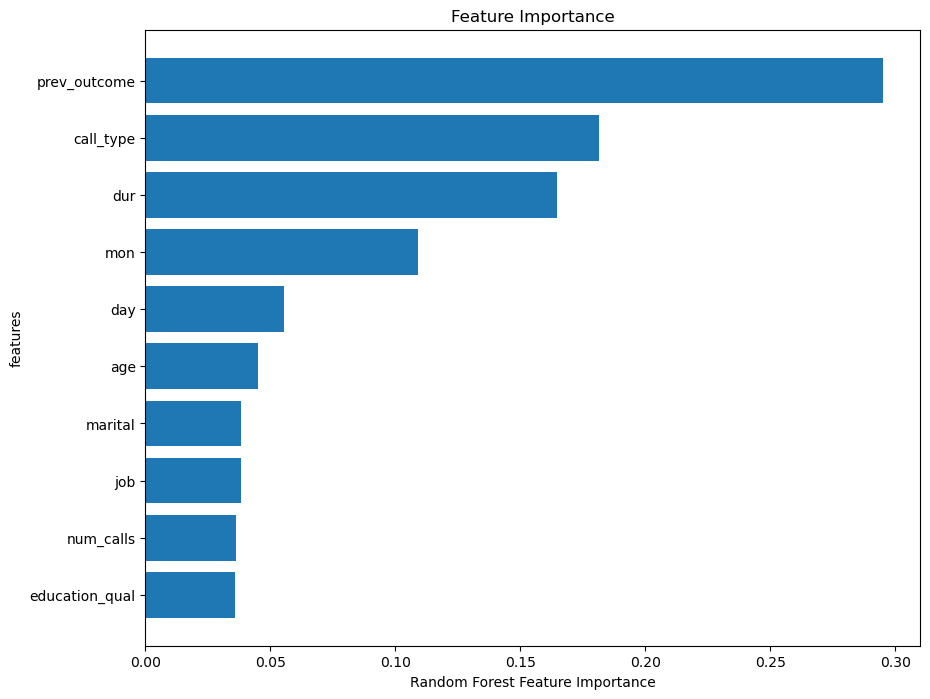

In [109]:
sorted_idx = x.feature_importances_.argsort()
plt.figure(figsize=(10,8))
plt.barh(df.columns[sorted_idx], x.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.ylabel('features')
plt.title("Feature Importance")
plt.show()

# Suggestions to Companies looking for People to undertake Insurance:

# Based on the feature importance given by Best Machine Learning Algorithm(Extreme-Gradient Boosting Classifier)-Companies who's looking for people for insurance undertaking should Focus on the features of order given below :

#### Previous Outcome 
##### Call type
##### Duration
##### Month
##### Day
###### Age
###### Marital
###### Jobs 
###### All other amenities equally affects accordingly